In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [14]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        #conv layers
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5) 
        #here, in_channels = 3 because for this training set, every image has 3 color channels
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 12, kernel_size = 5)
        
        #dense layers
        self.fc1 = nn.Linear(in_features = 12*5*5, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.fc3 = nn.Linear(in_features = 60, out_features = 10)
        
    def forward(self, t):
        #input layer
        t = t
        
        #1st conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        #2nd conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)
        
        #flatten the tensor before passing to fully connected layer
        t = t.reshape(-1, 12*5*5)
        
        #1st dense layer
        t = self.fc1(t)
        t = F.relu(t)
        
        #2nd dense layer
        t = self.fc2(t)
        t = F.relu(t)
        
        #output layer
        t = self.fc3(t)
        #t = F.softmax(t, dim=1) #no need to use this if we use cross entropy loss function
        
        return t

In [15]:
train_set = torchvision.datasets.CIFAR10(
    root = "./data/CIFAR10",
    download = True,
    train = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
)

Files already downloaded and verified


In [16]:
#define the outputs
outputs = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [17]:
#get the number of correct predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [18]:
#instantiate the network instance
network = Network()
criterion = nn.CrossEntropyLoss()
#load data
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64)
optimizer = optim.Adam(network.parameters(), lr = 0.001)

In [19]:
#use CUDA if available
if torch.cuda.is_available():
    network = network.to('cuda')
    criterion = criterion.to('cuda')

In [20]:
#plotting the data
image, label = next(iter(train_set))

In [21]:
image.shape, label

(torch.Size([3, 32, 32]), 6)

In [22]:
image.squeeze(dim=0).shape

torch.Size([3, 32, 32])

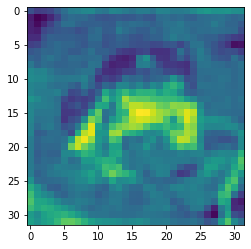

Label:  frog


In [23]:
plt.imshow(image[1])
plt.show()
print("Label: ", outputs[label])

In [25]:
#Training loop
for epoch in range(50):
    total_loss = 0
    total_correct = 0
    for batch in train_loader:
        
        images, labels = batch
        images = images.to('cuda')
        labels = labels.to('cuda')
        
        #calculate predictions
        preds = network(images)
        
        #calculate loss
        loss = criterion(preds, labels)
        
        #zero out the gradients
        optimizer.zero_grad()
        
        #backpropagate through the network
        loss.backward()
        
        #update the weights
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)
        
    print("Epoch:", epoch, "total_correct:", total_correct, "total_loss:", total_loss)

Epoch: 0 total_correct: 19182 total_loss: 1322.4536123275757
Epoch: 1 total_correct: 24604 total_loss: 1102.7133022546768
Epoch: 2 total_correct: 26992 total_loss: 1005.7934300303459
Epoch: 3 total_correct: 28614 total_loss: 940.735978782177
Epoch: 4 total_correct: 29819 total_loss: 891.8546277284622
Epoch: 5 total_correct: 30715 total_loss: 852.6998578310013
Epoch: 6 total_correct: 31448 total_loss: 820.3628101944923
Epoch: 7 total_correct: 32123 total_loss: 792.0818535089493
Epoch: 8 total_correct: 32591 total_loss: 767.8889380097389
Epoch: 9 total_correct: 33229 total_loss: 745.2770654559135
Epoch: 10 total_correct: 33724 total_loss: 723.4989399909973
Epoch: 11 total_correct: 34131 total_loss: 704.7383422851562
Epoch: 12 total_correct: 34496 total_loss: 686.2289029955864
Epoch: 13 total_correct: 34874 total_loss: 669.7917916178703
Epoch: 14 total_correct: 35227 total_loss: 652.8074305653572
Epoch: 15 total_correct: 35556 total_loss: 638.8873037397861
Epoch: 16 total_correct: 35862 t

In [53]:
#no. of correct outputs
acc = total_correct/len(train_set)
print("Accuracy:", acc*100, "percent")

Accuracy: 80.638 percent


In [42]:
#get the batch for predictions
images, labels = next(iter(train_loader))

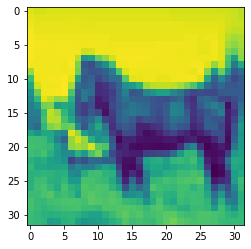

Label: horse


In [43]:
plt.imshow(images[12][1])
plt.show()
print("Label:", outputs[labels[12]])

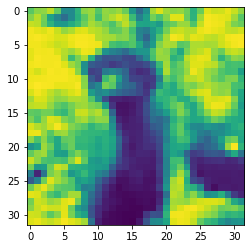

Label: bird


In [44]:
plt.imshow(images[55][1])
plt.show()
print("Label:", outputs[labels[55]])

In [46]:
#use CUDA if available
if torch.cuda.is_available():
    images = images.to('cuda')
    labels = labels.to('cuda')

In [47]:
#predictions
pred = network(images[12].unsqueeze(dim=0))

In [48]:
print(pred)

tensor([[ -9.8678, -15.6550,  -3.3498, -11.0591,   2.7984,  -6.1777, -28.3726,
           8.6333, -19.9943, -12.0852]], device='cuda:0',
       grad_fn=<AddmmBackward>)


In [49]:
print("prediction:",outputs[pred.argmax(dim=1)])

prediction: horse


In [50]:
#second predictions
pred = network(images[55].unsqueeze(dim=0))

In [51]:
print(pred)

tensor([[-3.1135, -5.5484,  2.6142,  1.2084, -1.1146, -0.1134, -1.5176, -0.4149,
         -8.2174, -2.4923]], device='cuda:0', grad_fn=<AddmmBackward>)


In [52]:
print("prediction:", outputs[pred.argmax(dim=1)])

prediction: bird
